# <center>Supervised vs Unsupervised</center>
---

## Convert supervised data to unsupervised data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

We use matplotlib and seaborn for plotting, numpy to handle the numerical arrays, pandas to create dataframes from the numerical arrays and scikit-learn (sklearn) to get the data and perform t-SNE.

After the imports, we need to either download the data and read it separately or use sklearn’s built-in function that provides us with the MNIST dataset.

In [8]:
data = datasets.fetch_openml(
    name = "mnist_784",
    version = 1,
    return_X_y = True,
    parser = "auto"
)

In [19]:
pixel_values, targets = data
targets = targets.astype(int)

pixel_values.shape, targets.shape

((70000, 784), (70000,))

In this part of the code, we have fetched the data using sklearn datasets, and we have an array of pixel values and another array of targets. Since the targets are of string type, we convert them to integers.

`pixel_values` is a 2-dimensional array of shape 70000x784. There are 70000 different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.

We can visualize the samples in this dataset by reshaping them to their original shape and then plotting them using matplotlib.

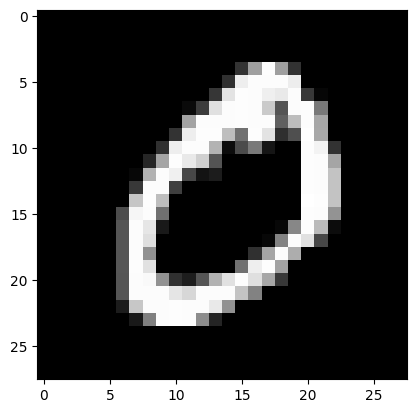

In [36]:
single_image = np.reshape(pixel_values.iloc[1], newshape = (28, 28))

plt.imshow(single_image, cmap='gray')
plt.show()

The most important step comes after we have grabbed the data.

In [26]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

This step creates the t-SNE transformation of the data. We use only two components as we can visualize them well in a two-dimensional setting. The transformed_data, in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like this can be converted to a pandas dataframe by calling pd.DataFrame on the array.

In [27]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"] 
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

Here we are creating a pandas dataframe from a numpy array. There are three columns: x, y and targets. x and y are the two components from t-SNE decomposition and targets is the actual number. This gives us a dataframe which looks like the one shown below

In [29]:
tsne_df.head()

,x,y,targets
0,17.999462,-8.141093,5.0
1,55.187473,-2.348034,0.0
2,1.256404,-53.400070,4.0
3,-43.894531,8.786691,1.0
4,-8.768785,-31.766354,9.0


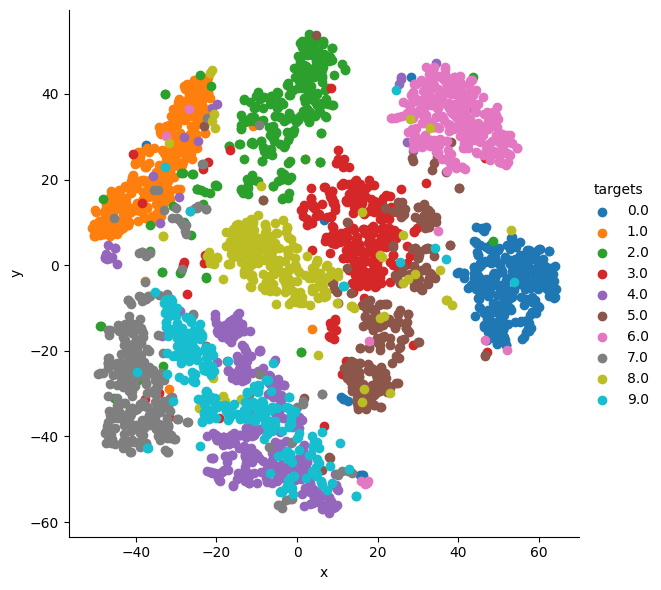

In [35]:
grid = sns.FacetGrid(
    data = tsne_df, 
    hue="targets",
    height = 6
)

grid.map(plt.scatter, "x", "y").add_legend()

plt.show()

This is one way of visualizing unsupervised datasets. We can also do k-means clustering on the same dataset and see how it performs in an unsupervised setting. One question that arises all the time is how to find the optimal number of clusters in k-means clustering. Well, there is no right answer. You have to find the number by cross-validation.